In [1]:
from source import data_import
import pandas as pd


In [2]:
p_df = data_import.import_patients(patient_ids=[1,2], seizure_flag=True)
p_df.head()

chb01_03.edf was import but not resampled 256Hz.
chb01_03.edf seizure and buffer was labeled
chb01_04.edf was import but not resampled 256Hz.
chb01_04.edf seizure and buffer was labeled
chb01_15.edf was import but not resampled 256Hz.
chb01_15.edf seizure and buffer was labeled
chb01_16.edf was import but not resampled 256Hz.
chb01_16.edf seizure and buffer was labeled
chb01_18.edf was import but not resampled 256Hz.
chb01_18.edf seizure and buffer was labeled
chb01_21.edf was import but not resampled 256Hz.
chb01_21.edf seizure and buffer was labeled
chb01_26.edf was import but not resampled 256Hz.
chb01_26.edf seizure and buffer was labeled
patient chb01 sessions concatenated.
chb02_16+.edf was import but not resampled 256Hz.
chb02_16+.edf seizure and buffer was labeled
chb02_16.edf was import but not resampled 256Hz.
chb02_16.edf seizure and buffer was labeled
chb02_19.edf was import but not resampled 256Hz.
chb02_19.edf seizure and buffer was labeled
patient chb02 sessions concaten

channel,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,F4-C4,...,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,is_seizure,before_seizure
0 days 00:00:00,-17.777778,39.267399,-3.711844,8.400488,-0.586081,4.102564,37.704518,-15.042735,-17.387057,-45.128205,...,180.317460,-18.559219,85.372405,4.102564,20.903541,-9.181929,-39.65812,-59.97558,False,False
0 days 00:00:00.003906250,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,...,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.19536,0.19536,False,False
0 days 00:00:00.007812500,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,...,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.19536,0.19536,False,False
0 days 00:00:00.011718750,0.586081,0.195360,0.195360,0.195360,0.195360,0.195360,0.586081,-0.195360,0.195360,0.586081,...,2.148962,0.586081,0.586081,0.195360,1.367521,-0.195360,-0.19536,0.19536,False,False
0 days 00:00:00.015625,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,...,2.148962,0.195360,0.195360,0.195360,-0.195360,0.195360,0.19536,0.19536,False,False


In [3]:
data_import.save_pyarrow(p_df, file_name="preprocess_test")

/home/weasel/reps/ai-seizure-detectives/source/../data/preprocess_test.arrow was successfully written.


In [4]:
p_df = data_import.load_pyarrow(file_name="preprocess_test")

/home/weasel/reps/ai-seizure-detectives/source/../data/preprocess_test.arrow was loaded.


In [5]:
from source.filter_eeg_channels import filter_eeg_channels

channels = [
    'FP1-F3',
    'FP1-F7',
    'T8-P8-0',
    'T8-P8-1',
    'CZ-PZ',
    'FP2-F8',
    'P8-O2',
    'P7-O1',
    'T7-P7',
    'FT9-FT10']

exclude_ranges=[[58, 62], [118, 122]]
fit_df = filter_eeg_channels(p_df, channels, fs=256, exclude_ranges=exclude_ranges, Q=30)
fit_df.head()

channel,FP1-F3,FP1-F7,T8-P8-0,T8-P8-1,CZ-PZ,FP2-F8,P8-O2,P7-O1,T7-P7,FT9-FT10,before_seizure,is_seizure
0 days 00:00:00,-0.398710,-12.094205,-40.801330,-40.801330,58.078766,69.242647,122.669795,5.714844,-2.525164,-6.246458,False,False
0 days 00:00:00.003906250,-0.002848,-3.984894,-13.759008,-13.759008,19.907382,23.708426,41.899137,2.078676,-0.726857,-1.993871,False,False
0 days 00:00:00.007812500,0.147268,-0.758705,-2.982458,-2.982458,4.677136,5.541929,9.680581,0.620845,-0.017454,-0.305718,False,False
0 days 00:00:00.011718750,0.009338,-4.978767,-18.140539,-18.140539,26.544704,32.357222,56.623853,2.755701,-0.945918,-2.883424,False,False
0 days 00:00:00.015625,0.440694,6.179067,19.951526,19.951526,-27.708167,-32.562009,-57.208789,-2.511603,1.467580,3.174129,False,False


In [6]:
### go through non-seizure data (before_seizure)
# extract seizure-starts
    # for each seizure start
        # get previous 20 seconds
        # check if is_seizure in it AND if all are before_seizure
            # yes: drop and continue to next seizure start
        # take 20 seconds:
            # mean of amplitude over time per channel
            # mean of power spectrum for frequency ranges per channel

### go through seizure data (is_seizure)
# take seizre-starts
    # for each seizure start
        # get next 20 seconds
        # check if all are is_seizure
            # no: drop and continue
        # take 20 seconds:
            # mean of amplitude over time per channel
            # mean of power spectrum for frequency ranges per channel

# out put: data resampled to 20sec with features

In [7]:
fit_df.info()

<class 'pandas.core.frame.DataFrame'>
TimedeltaIndex: 8213504 entries, 0 days 00:00:00 to 0 days 08:54:43.996093750
Freq: 3906250N
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   FP1-F3          float64
 1   FP1-F7          float64
 2   T8-P8-0         float64
 3   T8-P8-1         float64
 4   CZ-PZ           float64
 5   FP2-F8          float64
 6   P8-O2           float64
 7   P7-O1           float64
 8   T7-P7           float64
 9   FT9-FT10        float64
 10  before_seizure  bool   
 11  is_seizure      bool   
dtypes: bool(2), float64(10)
memory usage: 705.0 MB


In [8]:
fit_df['seizure_start'] = fit_df['is_seizure'] & ~fit_df['is_seizure'].shift(fill_value=False)
fit_df.loc[fit_df['seizure_start'] == True, 'seizure_start']

0 days 00:49:55    True
0 days 01:24:26    True
0 days 02:28:51    True
0 days 03:16:54    True
0 days 04:28:39    True
0 days 05:05:26    True
0 days 06:31:01    True
0 days 07:28:16    True
0 days 07:40:54    True
0 days 08:50:52    True
Name: seizure_start, dtype: bool

In [9]:
fit_df['seizure_id'] = fit_df['seizure_start'].cumsum()
fit_df['seizure_id'].tail()

0 days 08:54:43.980468750    10
0 days 08:54:43.984375       10
0 days 08:54:43.988281250    10
0 days 08:54:43.992187500    10
0 days 08:54:43.996093750    10
Freq: 3906250N, Name: seizure_id, dtype: int64

In [10]:
fit_df.index

TimedeltaIndex([          '0 days 00:00:00', '0 days 00:00:00.003906250',
                '0 days 00:00:00.007812500', '0 days 00:00:00.011718750',
                   '0 days 00:00:00.015625', '0 days 00:00:00.019531250',
                '0 days 00:00:00.023437500', '0 days 00:00:00.027343750',
                   '0 days 00:00:00.031250', '0 days 00:00:00.035156250',
                ...
                '0 days 08:54:43.960937500', '0 days 08:54:43.964843750',
                   '0 days 08:54:43.968750', '0 days 08:54:43.972656250',
                '0 days 08:54:43.976562500', '0 days 08:54:43.980468750',
                   '0 days 08:54:43.984375', '0 days 08:54:43.988281250',
                '0 days 08:54:43.992187500', '0 days 08:54:43.996093750'],
               dtype='timedelta64[ns]', length=8213504, freq='3906250N')

In [11]:
# extract seizure-stab4seizure_intervals
    # for each seizure start

fit_df['segment_id'] = 0

b4_seizure = []
# for time, seizure in (s_df[s_df == True]).items():
for time, seizure in fit_df.loc[fit_df['seizure_start'] == True, 'seizure_start'].items():
    intervals = []
    segment_id = 15
    while True:
        # get previous 20 seconds
        int_end = time - fit_df.index.freq
        int_start = time - (pd.Timedelta(seconds=20))
        
        if int_start < pd.Timedelta('0S'):
            raise('this should probably not happen.')
        b4s_int = fit_df.loc[int_start:int_end, :].copy()
        b4s_int['segment_id'] = segment_id
    
        # check if is_seizure in it AND if all are before_seizure
        # s_int.loc['10S', 'is_seizure'] = True  # check
        if any(b4s_int['is_seizure']) or not all(b4s_int['before_seizure']):
            print(f"either previous seizure found or start of before seizure interval reached. seizure number: {b4s_int['seizure_id'].values[0]}")
            break # get out of while loop
            
        intervals.insert(0, b4s_int)
        time = int_start
        segment_id -= 1
    
    b4_seizure.extend(intervals)

b4seizure_df = pd.concat(b4_seizure)

# b4seizure_df.info()


either previous seizure found or start of before seizure interval reached. seizure number: 0
either previous seizure found or start of before seizure interval reached. seizure number: 1
either previous seizure found or start of before seizure interval reached. seizure number: 2
either previous seizure found or start of before seizure interval reached. seizure number: 3
either previous seizure found or start of before seizure interval reached. seizure number: 4
either previous seizure found or start of before seizure interval reached. seizure number: 5
either previous seizure found or start of before seizure interval reached. seizure number: 6
either previous seizure found or start of before seizure interval reached. seizure number: 7
either previous seizure found or start of before seizure interval reached. seizure number: 8
either previous seizure found or start of before seizure interval reached. seizure number: 9


In [12]:
b4seizure_df.shape

(721920, 15)

In [13]:
fitted_b4_seizure = b4seizure_df.groupby(['seizure_id', 'segment_id']).agg(['mean', 'std'])
fitted_b4_seizure.tail(50)

channel                  FP1-F3               FP1-F7               T8-P8-0  \
                           mean        std      mean         std      mean   
seizure_id segment_id                                                        
6          2           0.256847  54.540003  0.096727   48.382928  0.467191   
           3           0.252403  43.779259  0.178820   31.774911 -0.275831   
           4           0.216951  43.619171  0.344157   28.260917  0.351750   
           5           0.008608  45.401529  0.090258   34.362730 -0.626483   
           6          -0.073663  50.687012 -0.248642   32.454171  0.629584   
           7           0.277311  38.608875  0.364784   28.379639  0.967541   
           8           0.185096  47.936535  0.283020   37.022647  0.542299   
           9           0.349527  50.005276  0.053401   37.694026 -0.237169   
           10         -0.556437  43.826718 -0.277796   33.514240 -0.673725   
           11         -0.520965  54.283453 -0.720383   37.141777  0.098069   
           12          1.079998  67.506728  1.167803   57.705918  0.188876   
           13          0.392549  27.926449  0.156909   22.693209  0.066753   
           14         -0.039329  46.134574  0.260814   33.748010  1.330385   
           15          1.043554  50.442416  0.444839   37.542136 -0.127907   
7          1           0.808169  25.612798  0.037000   30.741322 -0.428234   
           2           0.306627  47.550449  1.391318   58.086009  0.263524   
           3           0.569185  47.270186  0.247152   48.383039  0.153356   
           4           0.139568  46.997479 -0.363951   53.237001  0.262873   
           5           0.280284  23.917982  0.234192   23.524307  0.247389   
           6           0.104238  54.195680 -0.686419   64.459767 -0.480463   
           7           6.238639  69.012435  6.033592   66.730615  0.603395   
           8          -5.165209  70.399156 -4.271819   71.503360 -1.076112   
           9          -0.061620  60.541748  0.075983   76.220649  1.007385   
           10         -1.609864  80.093294 -1.406732   79.403444  0.022273   
           11          1.056742  73.397962  0.624847   79.569848 -0.781690   
           12          1.092413  68.001736  1.325668   91.277708  0.293233   
           13          0.246258  58.559249  0.841088   75.546509  0.239622   
           14          0.219607  74.287903 -0.885463   86.633020  0.080158   
           15         -0.409006  64.080599  1.144119   94.465362 -1.033961   
8          10          0.546726  58.166715  0.880695   56.778968 -0.010820   
           11          0.272056  63.381159 -0.885902   61.679346 -0.634789   
           12         -0.357488  47.831904  0.216741   58.954197  0.692558   
           13          0.296829  31.376445  0.717781   38.284363  0.552602   
           14          1.072670  60.237734  1.467200   69.764058 -0.102663   
           15          2.029174  67.039883  0.658309   77.667092  0.381620   
9          1          -0.082589  49.331982  0.316164   49.765928  0.555006   
           2           0.920137  29.031590  0.682557   38.279602 -0.001617   
           3           0.605002  24.337714  0.555300   26.524096 -0.046721   
           4          -0.295775  34.303335 -0.611301   36.350543  0.359620   
           5           1.418255  48.348495  1.054220   50.251548  0.231865   
           6          -0.530533  51.700697  0.229110   57.553205  0.084666   
           7          -0.552597  58.043876 -1.446920   67.252157 -0.539233   
           8           1.409712  62.940506  2.614802   84.076009  1.087612   
           9          -0.315303  76.489801  0.079550  117.508989 -1.150539   
           10         -0.097480  84.423582 -0.270315  120.857433  0.170542   
           11         -0.047434  89.219655 -0.177088  134.469884 -0.645061   
           12          0.526745  95.078303  1.878612  142.679730 -1.020688   
           13          0.522396  99.223775 -0.946765  157.023299 -0.470746   
           14         

<Axes: xlabel='seizure_id,segment_id'>

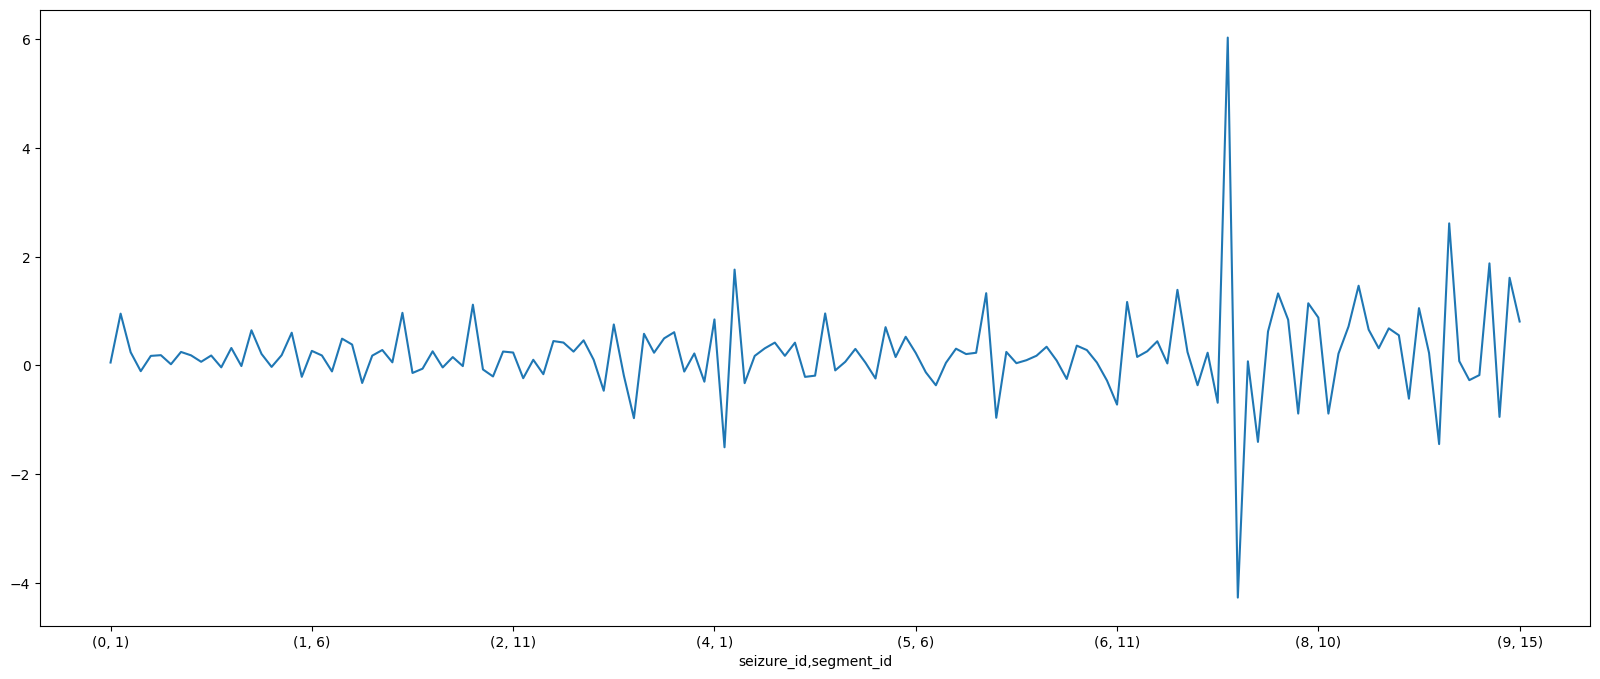

In [14]:
fitted_b4_seizure['FP1-F7', 'mean'].plot(figsize=[20,8])

<Axes: >

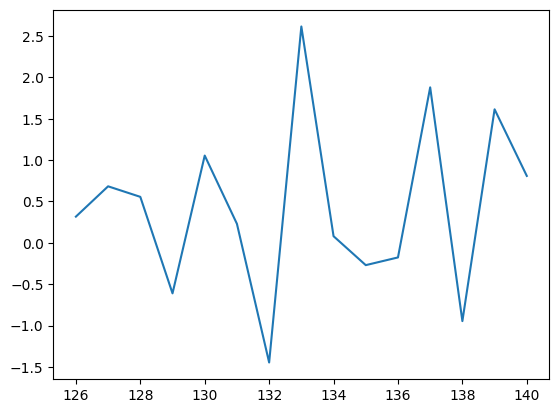

In [17]:
f = fitted_b4_seizure.reset_index()
f.loc[f['seizure_id'] == f['seizure_id'].max(), 'FP1-F7']['mean'].plot() #.iloc[-1, :] #['FP1-F7', 'mean'].plot(figsize=[20,8])


### Seizures

In [18]:
fit_df['segment_id'] = 0

post_seizure = []
# for time, seizure in (s_df[s_df == True]).items():
for time, seizure in fit_df.loc[fit_df['seizure_start'] == True, 'seizure_start'].items():
    intervals = []
    segment_id = 1
    while True:
        # get previous 20 seconds
        int_start = time  
        int_end = int_start + (pd.Timedelta(seconds=20))
        if int_start > fit_df.index[-1]:
            print('reached end of data.')
            break
        
        post_int = fit_df.loc[int_start: int_end, :].copy()
        post_int['segment_id'] = segment_id
    
        # check if is_seizure in it AND if all are before_seizure
        # s_int.loc['10S', 'is_seizure'] = True  # check
        if not all(post_int['is_seizure']):
            print(f"seizure end reached. seizure number: {post_int['seizure_id']}, number of segments completed: {segment_id-1}")
            break # get out of while loop

        intervals.append(post_int)
        time =  int_end + fit_df.index.freq
        segment_id += 1
    post_seizure.extend(intervals)

post_seizure_df = pd.concat(post_seizure)

seizure end reached. seizure number: 0 days 00:50:35.007812500    1
0 days 00:50:35.011718750    1
0 days 00:50:35.015625       1
0 days 00:50:35.019531250    1
0 days 00:50:35.023437500    1
                            ..
0 days 00:50:54.992187500    1
0 days 00:50:54.996093750    1
0 days 00:50:55              1
0 days 00:50:55.003906250    1
0 days 00:50:55.007812500    1
Freq: 3906250N, Name: seizure_id, Length: 5121, dtype: int64, number of segments completed: 2
seizure end reached. seizure number: 0 days 01:24:46.003906250    2
0 days 01:24:46.007812500    2
0 days 01:24:46.011718750    2
0 days 01:24:46.015625       2
0 days 01:24:46.019531250    2
                            ..
0 days 01:25:05.988281250    2
0 days 01:25:05.992187500    2
0 days 01:25:05.996093750    2
0 days 01:25:06              2
0 days 01:25:06.003906250    2
Freq: 3906250N, Name: seizure_id, Length: 5121, dtype: int64, number of segments completed: 1
seizure end reached. seizure number: 0 days 02:29:31.007

In [19]:
fitted_post_seizure = post_seizure_df.groupby(['seizure_id', 'segment_id']).agg(['mean', 'std'])
fitted_post_seizure.tail(50)

channel                  FP1-F3                FP1-F7               T8-P8-0  \
                           mean         std      mean         std      mean   
seizure_id segment_id                                                         
1          1           0.343409   92.793229  0.667389   82.497669  0.673262   
           2          -0.580773  155.371282 -1.189283  140.904752 -0.272012   
2          1           0.042360   96.058191 -0.851293   84.007399  1.114443   
3          1          -0.796964   96.006347 -0.770599   88.265791  0.924174   
           2           2.614637  137.321092  2.440225  105.878426  0.581650   
4          1           5.409053  111.030313  4.225462  101.559822  1.338460   
           2          -5.268271  160.888840 -2.947298  159.968288  1.773090   
5          1          -0.807619   83.151425 -1.513079   75.978544 -0.586612   
           2           1.548324  139.674323  4.528847  168.270567  0.224160   
           3           0.185755  143.546631 -3.265577  153.779116  1.757953   
           4          -0.318121  144.667888  1.106714  156.916937 -0.427899   
6          1           0.178432   95.871639 -0.139088   94.102786 -0.360136   
           2           0.365990  110.513174 -0.009186  116.372173  0.493014   
           3          -0.053343  120.298321  0.637746  148.525043  0.067412   
           4           1.121671  175.046987  2.155938  164.663376 -0.728368   
7          1          -1.413405   92.605900 -0.489722   83.743169  1.074442   
           2           1.891172  126.792410  0.726534  142.607076 -0.655567   
           3           1.039598  121.945164  1.884157  139.577368 -0.689609   
           4          -1.230554  145.762399 -1.296024  148.869842  2.110318   
           5           0.601074  182.661809 -0.313249  160.156525 -2.232041   
8          1           1.087909   78.636932  0.457248   81.463011  1.354792   
           2           1.810726   84.373099  0.911199   66.370650 -1.189257   
           3          -0.351801  152.004788 -0.254674  100.396703  0.981425   
           4          -0.454982  167.187823  1.029818   93.299522  0.051575   
9          1          -2.686387   94.624350 -1.672368   97.025894 -0.037359   
           2           2.113809   90.617935  2.841116   74.086195 -0.209629   
           3           0.269699  124.526263 -2.377253   88.445147  1.079847   
           4          -1.086621  142.914153  1.256364   94.712934  0.326146   

channel                             T8-P8-1                 CZ-PZ              \
                              std      mean         std      mean         std   
seizure_id segment_id                                                           
1          1           107.968030  0.673262  107.968030  0.192075   77.066844   
           2           120.500504 -0.272012  120.500504  0.091279   90.620281   
2          1           127.788050  1.114443  127.788050 -0.021308   92.486208   
3          1            97.322345  0.924174   97.322345  1.329784  105.252345   
           2           119.463608  0.581650  119.463608  0.441701  120.692141   
4          1           114.123214  1.338460  114.123214 -4.698510  150.817032   
           2           121.750413  1.773090  121.750413  8.277220  139.902279   
5          1            85.872394 -0.586612   85.872394 -2.205905   74.261552   
           2           129.811540  0.224160  129.811540  5.051540  111.044482   
           3           116.827312  1.757953  116.827312 -2.292652  117.858924   
           4            91.865062 -0.427899   91.865062  1.606503   92.295899   
6          1           100.430867 -0.360136  100.430867  0.454675   72.938604   
           2           119.962827  0.493014  119.962827  0.075408  110.348922   
           3           113.948185  0.067412  113.948185  0.106228  104.211691   
           4           105.997028 -0.728368  105.997028  0.660939  104.832994   
7          1           100.964560  1.074442  100.964560 -3.632318   88.214808   
           

<Axes: xlabel='seizure_id,segment_id'>

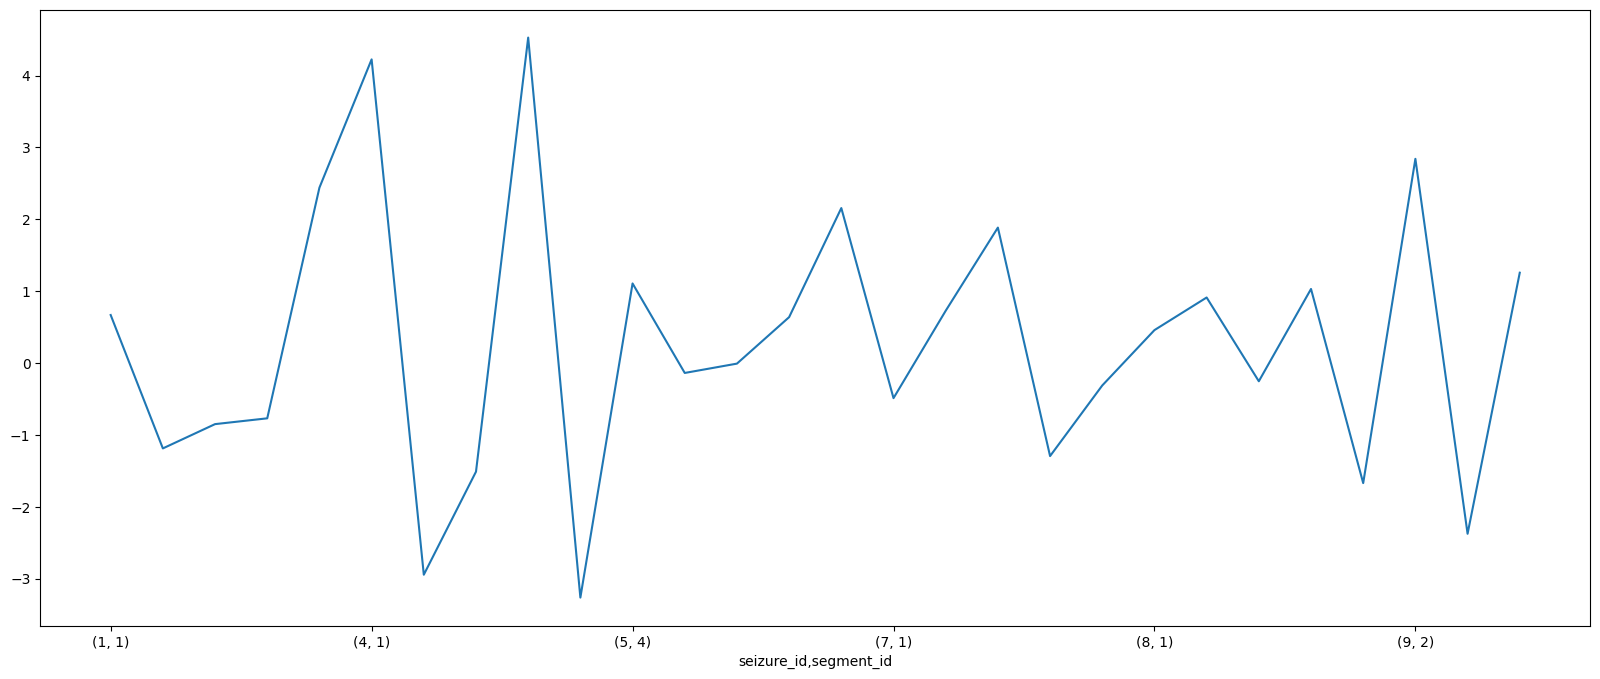

In [20]:
fitted_post_seizure['FP1-F7', 'mean'].plot(figsize=[20,8])

<Axes: >

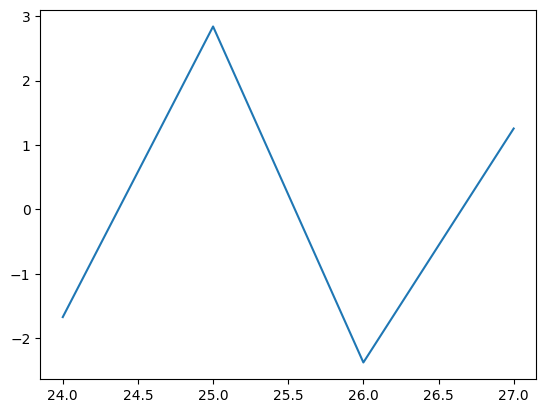

In [21]:
f = fitted_post_seizure.reset_index()
f.loc[f['seizure_id'] == f['seizure_id'].max(), 'FP1-F7']['mean'].plot() #.iloc[-1, :] #['FP1-F7', 'mean'].plot(figsize=[20,8])
